# Gruopwork_Wealth_Consumption

# Research Question

- Does household consume more when their wealth increases? 

- We are interested in the relationship between household wealth and private consumption. We expect to identify a positive relationship between consumption and wealth, using data for EU zone 20 countries, and Japan. Our methodology is OLS regression,Robust OLS,GLS and GLM, then we aim to compute Marginal Propensity to consume(MPC) and elasticity to represent the effect.

# 1 Import Data

## 1.1 EU 

In [20]:
 #Make sure to install ecbdata first
 #Run this line in terminal if not installed:
 #pip install ecbdata

In [27]:
# Some APIs or servers block requests from unknown proxies or anonymous sources for security reasons.
# If you're useing Mac OS, try disabling “Private Relay” in your iCloud settings — this may resolve the issue.
import pandas as pd
import matplotlib.pyplot as plt
from ecbdata import ecbdata
import os

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current working directory: {os.getcwd()}")

# Define save directory
save_dir = os.path.join("data", "raw data", "EU")
os.makedirs(save_dir, exist_ok=True)

# Download ECB data
eu_consumption = ecbdata.get_series('MNA.Q.Y.I9.W0.S1M.S1.D.P31._Z._Z._T.EUR.V.N')
eu_housing = ecbdata.get_series('DWA.Q.I9.S14.A.LE.NUN.HST.EUR.S.N')
eu_finance = ecbdata.get_series('DWA.Q.I9.S14.A.LE.F51M._Z.EUR.S.N')
eu_income = ecbdata.get_series("QSA.Q.N.I9.W0.S1M.S1._Z.B.B6G._Z._Z._Z.XDC._T.S.V.N._T")

# Save to CSV
eu_consumption.to_csv(os.path.join(save_dir, "consumption.csv"))
eu_housing.to_csv(os.path.join(save_dir, "housing_wealth.csv"))
eu_finance.to_csv(os.path.join(save_dir, "finance.csv"))
eu_income.to_csv(os.path.join(save_dir, "income.csv"))

print("EU Data downloaded successfully.")

Current working directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
EU Data downloaded successfully.


## 1.2 Japan

### 1.2.1 Resource

- **Consumption**: Household consumption expenditure (from Family Income and Expenditure Survey - 家計調査)
- **Housing Wealth**: Fixed assets (housing component) from National Accounts (SNA)
- **Stock Market Wealth**: Household financial assets (specifically "stocks") from National Accounts (SNA)
- **Income**: Compensation of employees from National Accounts (SNA)

### 1.2.2 Download Data
- Download household consumption data.

In [22]:
# Some APIs or servers block requests from unknown proxies or anonymous sources for security reasons.
# If you're useing Mac OS, try disabling “Private Relay” in your iCloud settings — this may resolve the issue.
import os
import requests

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Create directory if it doesn't exist
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# Define file path
save_path = os.path.join(save_dir, "household_consumption.xlsx")

# Download URL
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm1n_jp.xlsx"

# Download and Save
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'data/raw data/japan/household_consumption.xlsx'.


- Download stock market wealth data.
- Download houseing wealth data.

In [23]:
import os
import requests

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Create directory
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# Define file path
save_path = os.path.join(save_dir, "household_stock.xlsx")

# Download URL
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023si4_jp.xlsx"

# Download and Save
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'data/raw data/japan/household_stock.xlsx'.


- Download income data (compensation of employees).

In [24]:
import os
import pandas as pd
import requests

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Create directory if it doesn't exist
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# Define file path
save_path = os.path.join(save_dir, "employment_income.xlsx")

# Download URL
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm2_jp.xlsx"

# Download and Save
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

# Read back the file (optional step)
df = pd.read_excel(save_path)

# Re-save the file (optional, ensures formatting)
df.to_excel(save_path, index=False)

print(f"Employment income data downloaded and saved to '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Employment income data downloaded and saved to 'data/raw data/japan/employment_income.xlsx'.


# 2 Manipulate the data

## 2.1 EU

In [28]:
import pandas as pd

# Load data
consumption = pd.read_csv(os.path.join(save_dir, "consumption.csv"))
housing = pd.read_csv(os.path.join(save_dir, "housing_wealth.csv"))
finance = pd.read_csv(os.path.join(save_dir, "finance.csv"))
income = pd.read_csv(os.path.join(save_dir, "income.csv"))

# Process data
def preprocess(df, value_name):
    df = df[['TIME_PERIOD', 'OBS_VALUE']].dropna()
    df = df.rename(columns={'TIME_PERIOD': 'date', 'OBS_VALUE': value_name})
    df['date'] = pd.PeriodIndex(df['date'], freq='Q').to_timestamp()
    df = df[(df['date'] >= '2009-01-01') & (df['date'] <= '2024-10-01')]
    return df

# Preprocess data by flame
consumption = preprocess(consumption, 'consumption')
housing = preprocess(housing, 'housing_wealth')
finance = preprocess(finance, 'financial_assets')
income = preprocess(income, 'income')


## 2.2 Japan

- Manipulate household consumption data.

In [ ]:
import os
import sys
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# Add 'src' to sys.path
sys.path.append("src")
from data_function.extract_household_consumption import extract_household_consumption

# Define paths
save_path = "data/raw data/japan/household_consumption.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_consumption.csv")

# Create directory if not exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Extract and save
consumption_data = extract_household_consumption(save_path)
consumption_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: data/processing_data/japan/processed_household_consumption.csv


- Manipulate
  - stock market wealth data.
  - houseing wealth data.

In [29]:
import os
import sys
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# Add 'src' to sys.path
sys.path.append("src")
from data_function.extract_housing_and_stock import extract_housing_and_stock

# Define paths
file_path = "data/raw data/japan/household_stock.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_stock.csv")

# Create directories if not exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Extract and save
processed_data = extract_housing_and_stock(file_path)
processed_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: data/processing_data/japan/processed_household_stock.csv


- Manipulate income data (compensation of employees).

In [30]:
import os
import sys
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# Add 'src' to sys.path
sys.path.append("src")
from data_function.extract_employment_income import extract_employment_income

# Define paths
file_path = "data/raw data/japan/employment_income.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_employment_income.csv")

# Create directories if not exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Extract and save
processed_employment_income = extract_employment_income(file_path)
processed_employment_income.to_csv(processed_path, index=False)

print(f"Processed employment income data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed employment income data saved to: data/processing_data/japan/processed_employment_income.csv


# 3 Merge the data

## 3.1 EU

In [31]:
import os

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Define file paths
clean_path = "data/clean/EU"

# Merge by date
merged = consumption.merge(housing, on='date', how='outer') \
                    .merge(finance, on='date', how='outer') \
                    .merge(income, on='date', how='outer')

# Create clean directory if not exists
os.makedirs(clean_path, exist_ok=True)

# Save clean merged data
merged_path = os.path.join(clean_path, "merged_eu_data.csv")
merged.to_csv(merged_path, index=False)
print(merged.head())

print(f"Merged dataset saved successfully at {merged_path}!")

Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
        date   consumption  housing_wealth  financial_assets        income
0 2009-01-01  1.315107e+06       939390.47        2433442.25  1.470215e+06
1 2009-04-01  1.315919e+06       935309.12        2473142.39  1.592684e+06
2 2009-07-01  1.318336e+06       944321.11        2576393.26  1.485458e+06
3 2009-10-01  1.326403e+06       950845.01        2564141.07  1.565082e+06
4 2010-01-01  1.334665e+06       951515.77        2587176.63  1.481388e+06
Merged dataset saved successfully at data/clean/EU/merged_eu_data.csv!


## 3.2 Japan

In [32]:
import os
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Define file paths
raw_path = "data/processing_data/japan/"
clean_path = "data/clean/japan"

csv_files = {
    "household_consumption": os.path.join(raw_path, "processed_household_consumption.csv"),
    "housing_stock_wealth": os.path.join(raw_path, "processed_household_stock.csv"),
    "employee_income": os.path.join(raw_path, "processed_employment_income.csv"),
}

# Read dataset
consumption = pd.read_csv(csv_files["household_consumption"])
housing_stock = pd.read_csv(csv_files["housing_stock_wealth"])
employee_income = pd.read_csv(csv_files["employee_income"])

# Merge on 'year'
merged_data = consumption.merge(
    housing_stock, on="year", how="inner"
).merge(
    employee_income, on="year", how="inner"
)

# Check merged dataset
print(merged_data.head())
print(merged_data.columns)

# Round value columns
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns].round(0).astype(int)

# Create clean directory if not exists
os.makedirs(clean_path, exist_ok=True)

# Save merged data
merged_path = os.path.join(clean_path, "merged_macro_data.csv")
merged_data.to_csv(merged_path, index=False)

print(f"Merged dataset saved successfully at {merged_path}!")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
   year  household_consumption  fixed_asset  stock_asset  employment_income
0  1994               266250.9     397066.4     130971.4           262822.6
1  1995               271381.7     399831.5     128776.7           267095.2
2  1996               278702.4     416861.5     118755.9           272962.4
3  1997               279745.5     423410.6      86465.8           279054.2
4  1998               278920.2     418589.8      80110.8           273370.2
Index(['year', 'household_consumption', 'fixed_asset', 'stock_asset',
       'employment_income'],
      dtype='object')
Merged dataset saved successfully at data/clean/japan/merged_macro_data.csv!


# 4 Descriptive Statistics

## 4.1 EU

### 4.1.1 Indicator 

In [33]:
import pandas as pd
import os

# Load data
merged_path = os.path.join("data", "clean", "EU", "merged_eu_data.csv")
df_merge = pd.read_csv(merged_path, parse_dates=['date'])

# Show full descriptive statistics
print("Descriptive Statistics:")
print(df_merge[['consumption', 'housing_wealth','financial_assets','income']].describe())

Descriptive Statistics:
        consumption  housing_wealth  financial_assets        income
count  6.400000e+01    6.400000e+01      6.400000e+01  6.400000e+01
mean   1.550802e+06    1.062096e+06      3.950816e+06  1.786037e+06
std    2.020459e+05    1.304206e+05      1.150425e+06  2.543454e+05
min    1.315107e+06    9.147858e+05      2.433442e+06  1.470215e+06
25%    1.392863e+06    9.520339e+05      2.816647e+06  1.592234e+06
50%    1.497546e+06    1.019445e+06      3.928425e+06  1.703921e+06
75%    1.624575e+06    1.133254e+06      4.843694e+06  1.901443e+06
max    2.026434e+06    1.330407e+06      6.028015e+06  2.438200e+06


### 4.2.2 Growth Rate

In [34]:
# Calculate QoQ Growth Rate
df_growth = df_merge.copy()
df_growth['consumption_growth'] = df_growth['consumption'].pct_change() * 100
df_growth['housing_growth'] = df_growth['housing_wealth'].pct_change() * 100
df_growth['finance_growth'] = df_growth['financial_assets'].pct_change() * 100
df_growth['income_growth'] = df_growth['income'].pct_change() * 100
df_growth_clean = df_growth.dropna(subset=[
    'consumption_growth', 'housing_growth', 'finance_growth', 'income_growth'
])

# Show first few rows of growth rate
print("Growth Rates (% QoQ) without NaNs:")
print(df_growth_clean[['date', 'consumption_growth', 'housing_growth', 'finance_growth', 'income_growth']].head())


Growth Rates (% QoQ) without NaNs:
        date  consumption_growth  housing_growth  finance_growth  \
1 2009-04-01            0.061729       -0.434468        1.631440   
2 2009-07-01            0.183695        0.963531        4.174886   
3 2009-10-01            0.611874        0.690856       -0.475556   
4 2010-01-01            0.622888        0.070544        0.898373   
5 2010-04-01            0.821157        1.365674       -2.047182   

   income_growth  
1       8.329978  
2      -6.732396  
3       5.360243  
4      -5.347608  
5       8.411097  


## 4.2 Japan

### 4.2.1 Indicator 

In [35]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import os

# Move to project root safely
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Load merged data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)
# Show descriptive statistics
print("Descriptive Statistics (Original Data):")
# print(merged_data.describe())

# Convert values to billion yen (divide by 1000)
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Show descriptive statistics again after conversion
print("\nDescriptive Statistics (Converted to Billion Yen):")
print(merged_data.describe())


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Descriptive Statistics (Original Data):

Descriptive Statistics (Converted to Billion Yen):
              year  household_consumption  fixed_asset  stock_asset  \
count    30.000000              30.000000    30.000000    30.000000   
mean   2008.500000             286.519100   410.729967   143.437700   
std       8.803408               9.773603    13.696322    48.360759   
min    1994.000000             266.251000   385.535000    80.111000   
25%    2001.250000             280.426750   401.289750   102.274250   
50%    2008.500000             283.809500   409.338000   134.562500   
75%    2015.750000             291.108250   418.097250   178.615500   
max    2023.000000             314.756000   443.824000   250.212000   

       employment_income  
count          30.000000  
mean          268.422100  
std            13.729709  
min           251.155000  
25%           257.151000  
50%           266.433500  


### 4.2.2 Growth Rate

In [36]:
# Load merged data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Convert values to billion yen
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Calculate growth rates (%)
growth_data = merged_data.copy()
for col in value_columns:
    growth_data[col + "_growth"] = growth_data[col].pct_change() * 100

# Drop the first row with NaNs due to pct_change
growth_data = growth_data.dropna().reset_index(drop=True)

# Show descriptive statistics of growth rates
growth_columns = [col + "_growth" for col in value_columns]
print("Descriptive Statistics of Growth Rates (%):")
print(growth_data[growth_columns].describe().round(2))


Descriptive Statistics of Growth Rates (%):
       household_consumption_growth  fixed_asset_growth  stock_asset_growth  \
count                         29.00               29.00               29.00   
mean                           0.60                0.38                5.18   
std                            1.96                2.20               26.14   
min                           -5.29               -4.69              -39.15   
25%                           -0.24               -0.97               -9.10   
50%                            0.56                0.31               -0.45   
75%                            1.07                1.57               15.59   
max                            6.08                7.61               72.45   

       employment_income_growth  
count                     29.00  
mean                       0.50  
std                        1.95  
min                       -4.84  
25%                       -0.66  
50%                        1.11  
75%   

# 5 Visualization

## 5.1 EU

### 5.1.1 Time Series Plot

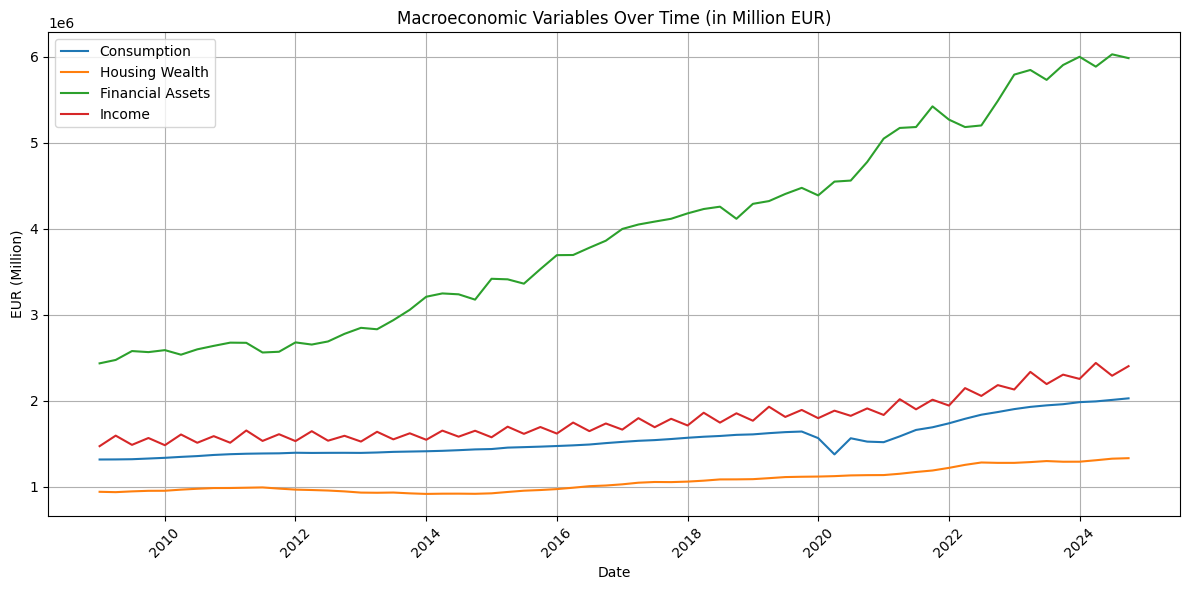

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_merge['date'], df_merge['consumption'], label='Consumption')
plt.plot(df_merge['date'], df_merge['housing_wealth'], label='Housing Wealth')
plt.plot(df_merge['date'], df_merge['financial_assets'], label='Financial Assets')
plt.plot(df_merge['date'], df_merge['income'], label='Income')

plt.xlabel('Date')
plt.ylabel('EUR (Million)')
plt.title('Macroeconomic Variables Over Time (in Million EUR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This line chart shows the time series of four key household macroeconomic variables in the EU from 2009 to 2024 (in million EUR).
- Explanation:
  - Financial assets have grown the fastest, while housing wealth and consumption follow a more moderate trajectory.
  - The COVID-19 shock in **2020** is clearly visible in both consumption and income, but recovery is also strong post-2021.
  - The data suggest that household financial resilience in the EU improved notably after 2014, particularly in terms of asset accumulation.
  - The overall pattern suggests a positive relationship: as housing wealth increases, consumption also tends to grow.

### 5.1.2 Normality

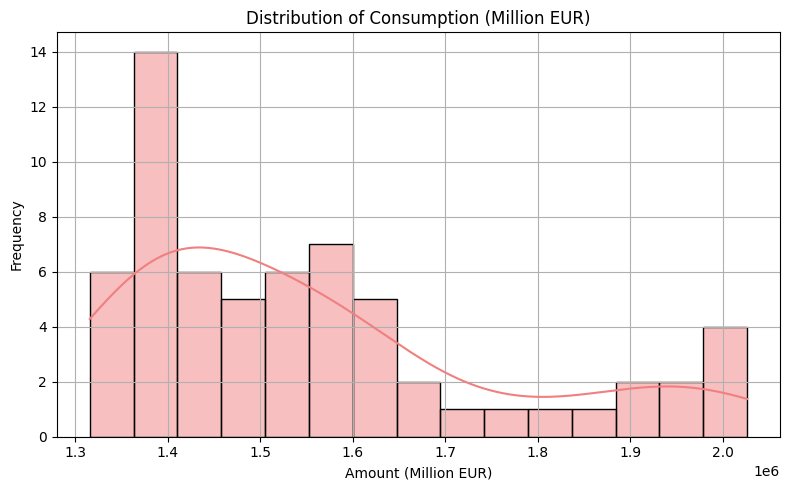

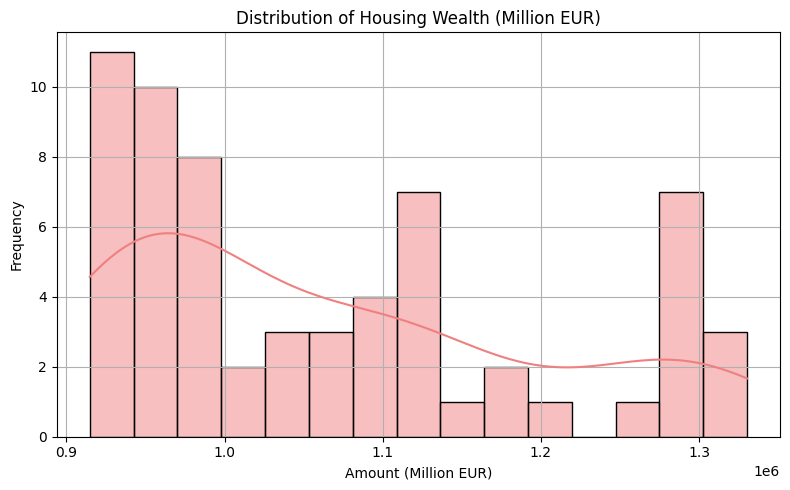

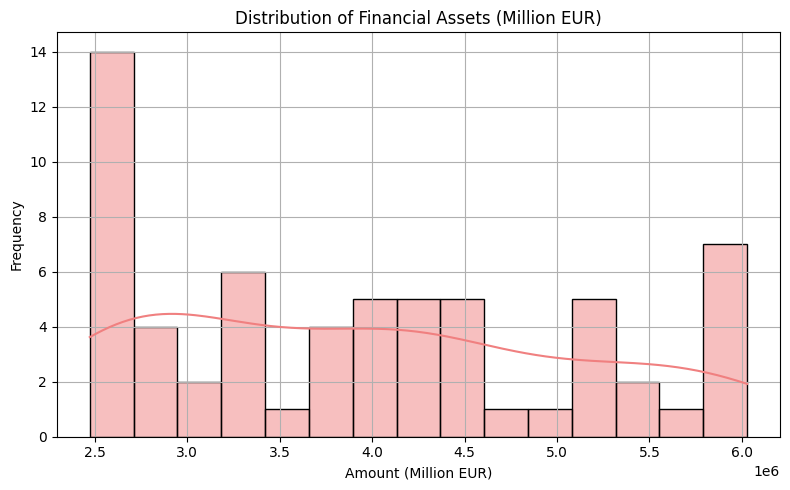

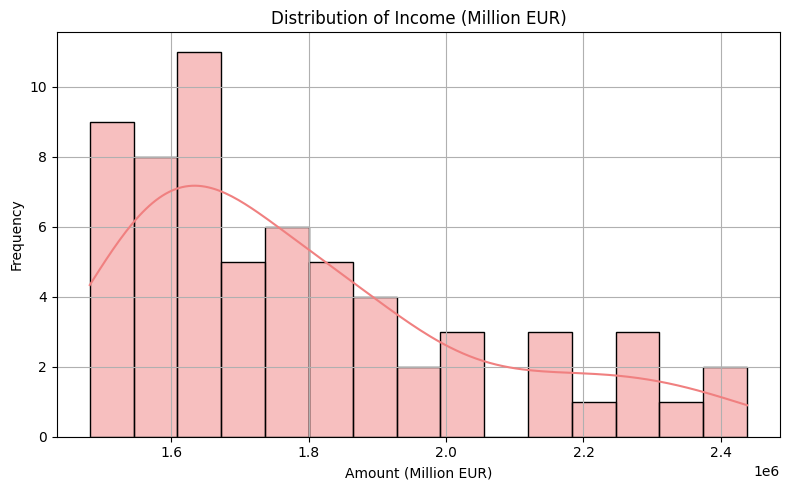

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load values
value_columns = [
    'consumption',
    'housing_wealth',
    'financial_assets',
    'income'
]

# Plot histograms for each variable
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_growth_clean[col], bins=15, kde=True, color='lightcoral')
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (Million EUR)")
    plt.xlabel("Amount (Million EUR)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

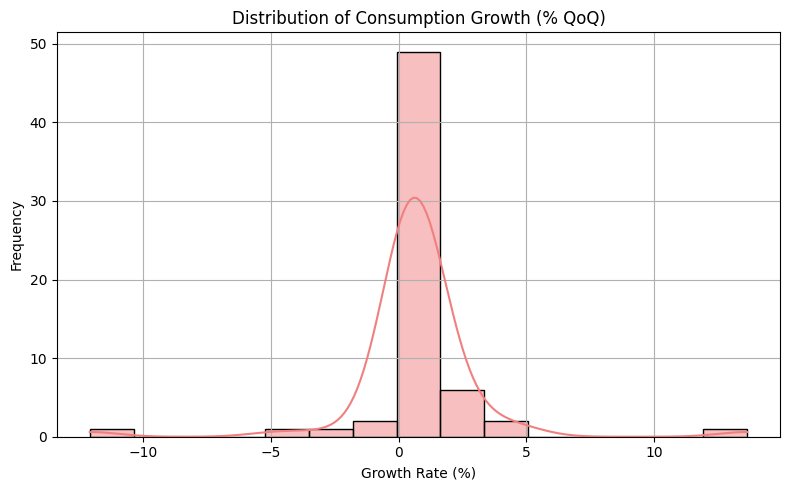

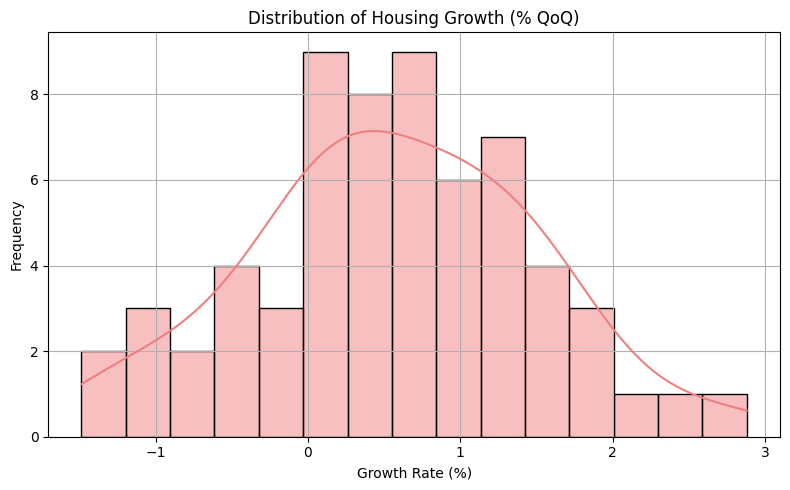

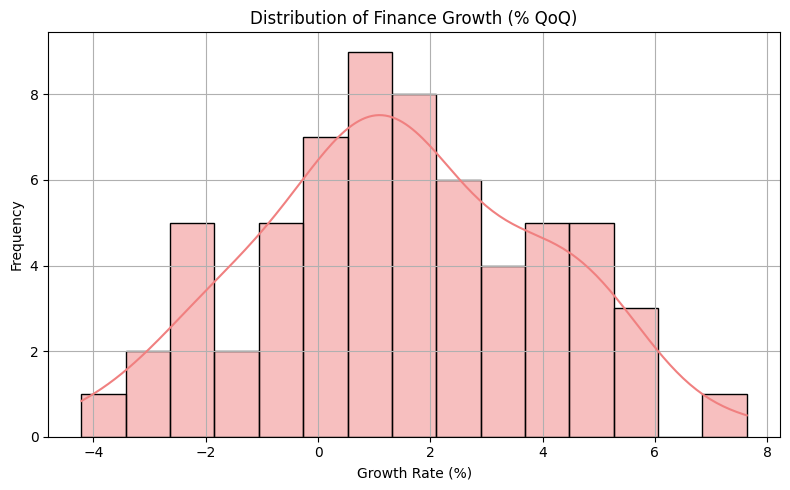

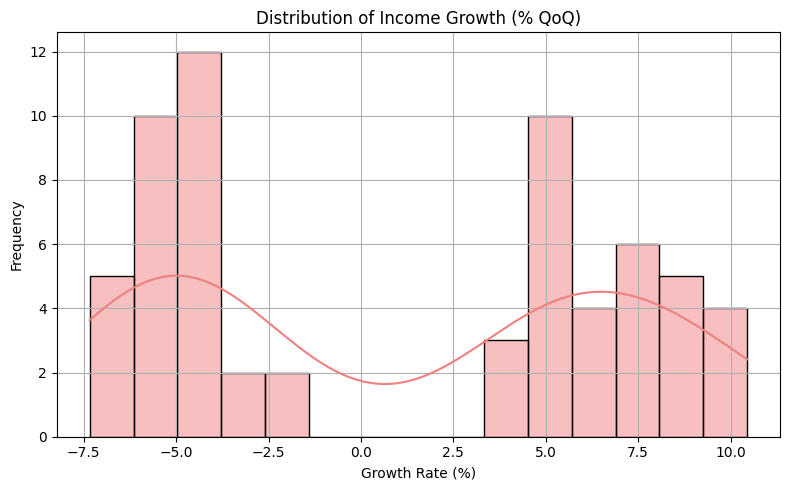

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load values
value_columns = [
    'consumption_growth',
    'housing_growth',
    'finance_growth',
    'income_growth'
]

# Plot histograms for each growth variable
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_growth_clean[col], bins=15, kde=True, color='lightcoral')
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (% QoQ)")
    plt.xlabel("Growth Rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 - After converting the data into growth rates, the distribution exhibited improved normality.

## 5.2 Japan

### 5.2.1 Indicator Plot

#### 5.2.1.1 Line Plot

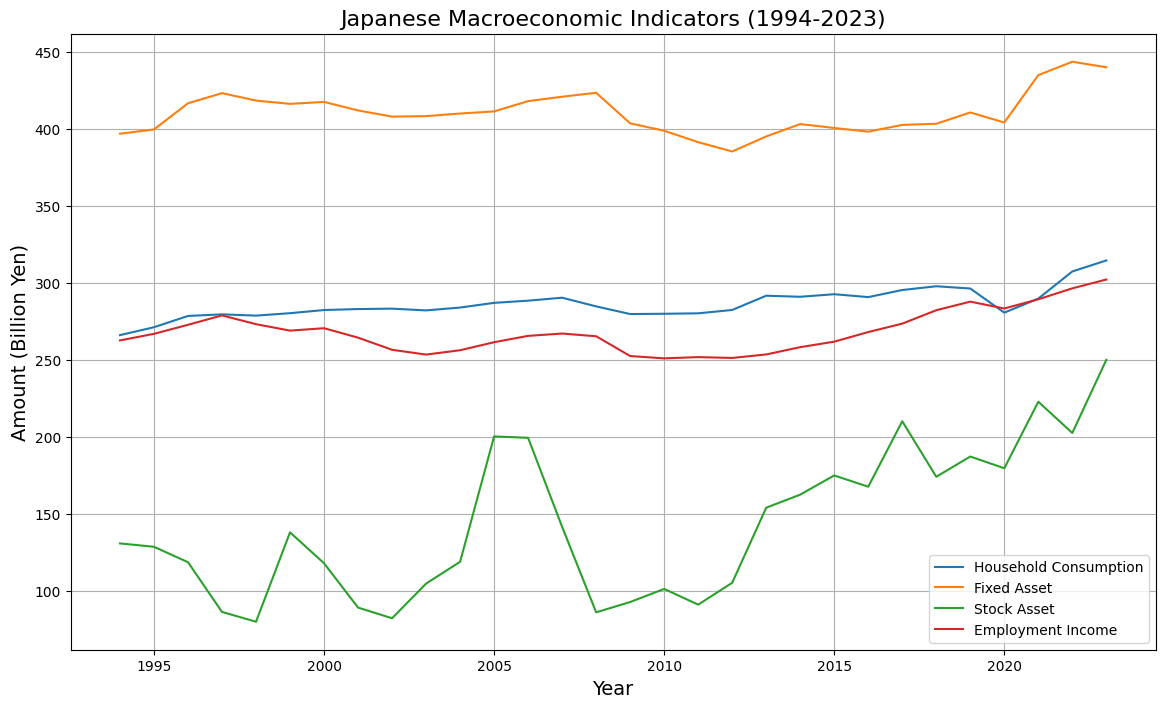

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot each variable
for column in value_columns:
    plt.plot(merged_data['year'], merged_data[column], label=column.replace('_', ' ').title())

# Title and labels
plt.title("Japanese Macroeconomic Indicators (1994-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount (Billion Yen)", fontsize=14)
plt.legend()
plt.grid(True)

# Save the figure if needed
# plt.savefig("macro_data_trends.png", dpi=300)

plt.show()


Case Study: 

Key Economic Shocks in Japan
- **Post-Bubble Stagnation (Late 1990s)**:
From 1994 onwards, both household consumption and employment income showed sluggish growth, reflecting Japan’s long stagnation after the burst of its asset bubble. Stock assets were highly volatile, indicating unstable investor sentiment.

- **2008 Global Financial Crisis**:
Around 2008, stock assets dropped sharply, reflecting global equity market turmoil. Household consumption and income showed mild declines, while fixed assets remained relatively stable, suggesting resilience in the real estate sector.

- **COVID-19 Pandemic (2020)**:
In 2020, all indicators showed disturbances. Stock assets fluctuated dramatically, while household consumption and employment income declined, indicating uncertainty in earnings and spending. Fixed assets showed modest change, again acting as a stabilizer.

Additional Insights from the Long-Term Trends
- Household consumption and employment income are tightly coupled, suggesting that Japanese consumer behavior is still strongly **income-driven**. Wealth effects (from asset appreciation) appear limited.

- Fixed asset values (housing wealth) exhibit a stable, long-term upward trend, especially after 2013. This may reflect the impact of Abenomics and ultra-low interest rates, positioning **real estate as a safer household asset class**.

- Stock assets show extreme volatility, with repeated surges and collapses. This indicates that financial markets are highly sensitive to global and domestic shocks, limiting their effectiveness as long-term household wealth vehicles.

- Post-2020 recovery across all indicators suggests short-term policy success, but the sustainability of this recovery—especially in real income and consumption—remains uncertain.


Overall, the chart shows steady growth in real economy indicators (consumption and income), while financial wealth (stock assets) exhibits more volatility, indicating different dynamics in asset accumulation and income.


#### 5.2.1.2 Normality

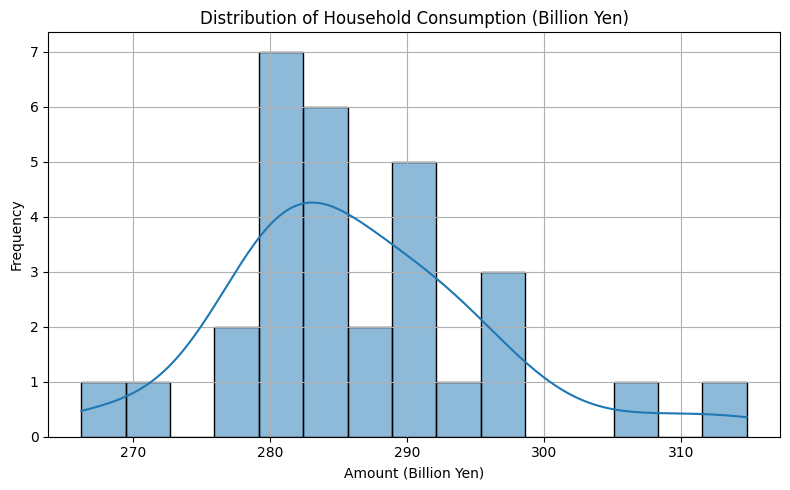

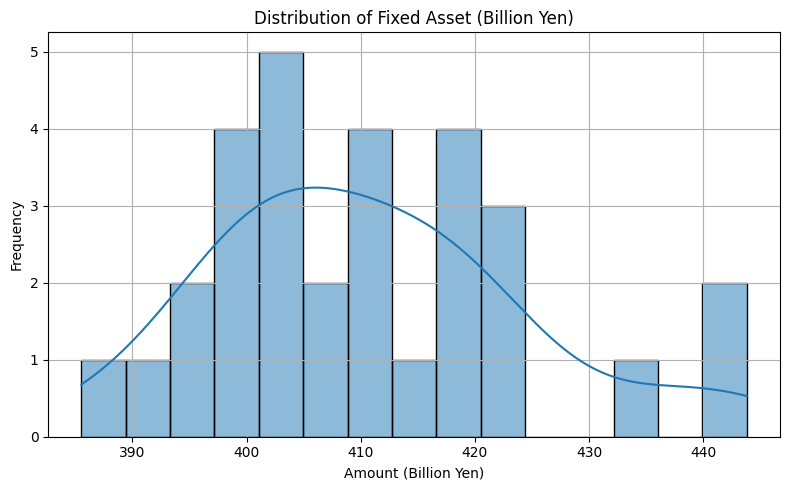

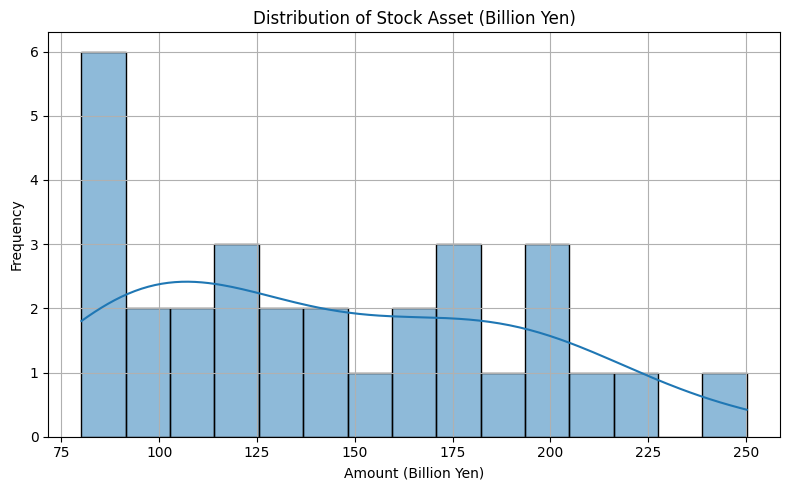

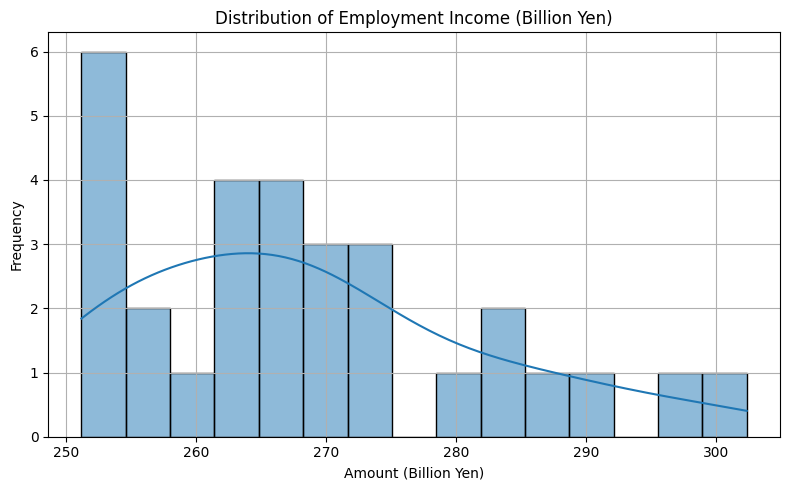

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each growth variable
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_data[col], bins=15, kde=True)
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (Billion Yen)")
    plt.xlabel("Amount (Billion Yen)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

1️⃣ Household Consumption
- The distribution is slightly right-skewed, with most values centered around 280–290 billion yen. This suggests a generally stable level of household consumption with a few years of stronger spending.

2️⃣ Fixed Asset
- The values are more symmetrically distributed, centered around 400–420 billion yen. This indicates that fixed assets (mainly housing wealth) remained relatively steady over time, with moderate variation.

3️⃣ Stock Asset
- This distribution is left-skewed, with a concentration of values below 150 billion yen, and a long tail toward higher values. This reflects occasional spikes in financial asset holdings, but most years show modest stock wealth.

4️⃣ Employment Income
- The distribution is right-skewed, peaking around 255–270 billion yen. It implies that labor income is relatively consistent across years, with a few outlier years of higher income likely due to economic upturns or wage policy changes.



### 5.2.2 Change of Indicator Plot

#### 5.2.2.1 Growth Rate

- Histograms of Growth Rates

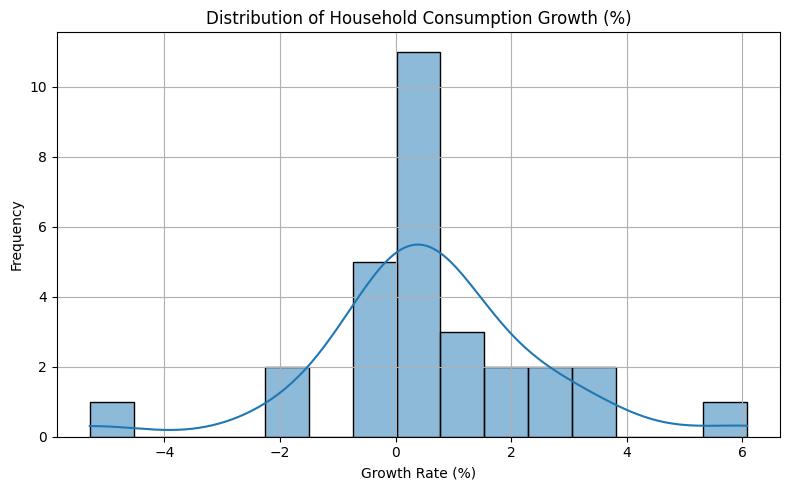

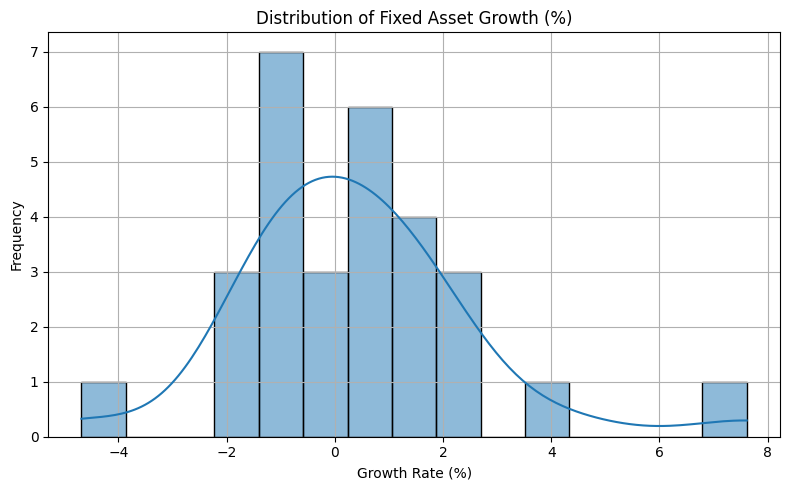

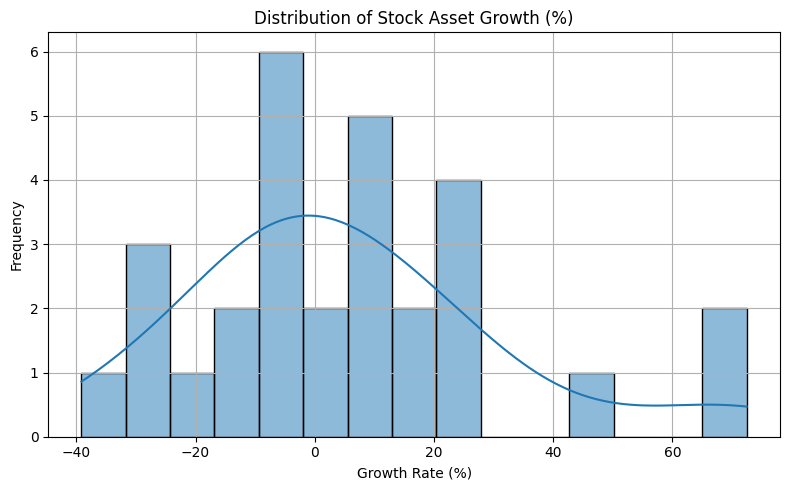

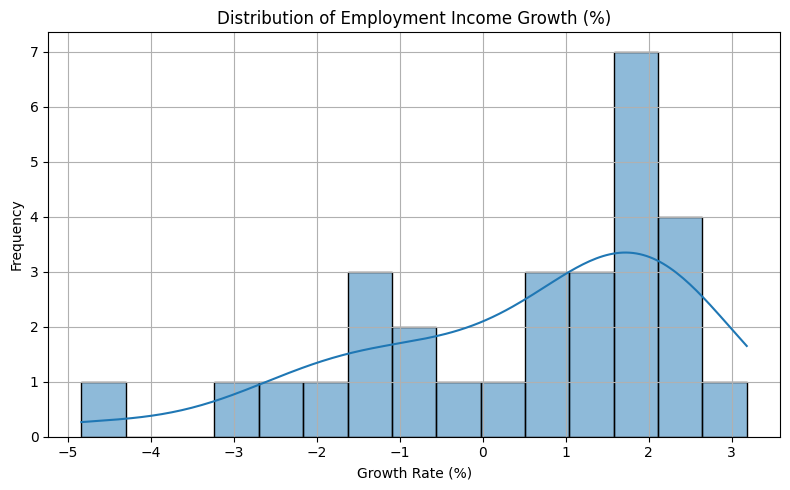

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each growth variable
for col in growth_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(growth_data[col], bins=15, kde=True)
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (%)")
    plt.xlabel("Growth Rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1️⃣ Distribution of Household Consumption Growth (%)
- This distribution is centered around 0%, indicating low but stable growth in household consumption.
Most values fall between -2% and 2%, with a few outliers on both sides. The bell shape suggests near-normality with slight skew.

2️⃣ Distribution of Fixed Asset Growth (%)
- The fixed asset growth distribution is also centered near zero, but with a wider spread than consumption.
It shows a slightly positive skew, indicating more frequent small declines and occasional strong positive growth years.

3️⃣ Distribution of Stock Asset Growth (%)
- This distribution is highly spread out and skewed, reflecting the high volatility of stock markets.
Growth rates range from -40% to over +60%, with frequent large fluctuations, indicating risk and opportunity in financial assets.

4️⃣ Distribution of Employment Income Growth (%)
- This distribution is right-skewed, with most growth rates clustered between 0% and 2%.
It shows that income tends to grow slowly and steadily, with fewer instances of negative growth or large increases.

- Shapiro-Wilk Normality Test

In [ ]:
from scipy.stats import shapiro

# Lists to hold variable
normal_vars = []
non_normal_vars = []

# Loop through each growth rate variable
print("Shapiro-Wilk Normality Test Results:\n")
for col in growth_columns:
    stat, p = shapiro(growth_data[col].dropna())
    result = f"{col}: W = {stat:.4f}, p-value = {p:.4f}"
    
    if p >= 0.05:
        normal_vars.append(result)
    else:
        non_normal_vars.append(result)

# Print variables that pass or not pass the normality test
print("Passed (Approximately Normal):")
for r in normal_vars:
    print("  ", r)

print("\nNot Normal (Rejected Normality):")
for r in non_normal_vars:
    print("  ", r)

Shapiro-Wilk Normality Test Results:

Passed (Approximately Normal):
   stock_asset_growth: W = 0.9340, p-value = 0.0700

Not Normal (Rejected Normality):
   household_consumption_growth: W = 0.9083, p-value = 0.0156
   fixed_asset_growth: W = 0.9117, p-value = 0.0189
   employment_income_growth: W = 0.9049, p-value = 0.0128


#### 5.2.2.2 Growth Rate of Log-Differenced

In [ ]:
import numpy as np

# Copy data
logdiff_data = merged_data.copy()

# Apply log transformation and first difference
for col in value_columns:
    log_col = f"log_{col}"
    logdiff_col = f"logdiff_{col}"

    logdiff_data[log_col] = np.log(logdiff_data[col])
    logdiff_data[logdiff_col] = logdiff_data[log_col].diff() * 100  # as % change

# Drop NaN from first difference
logdiff_data = logdiff_data.dropna().reset_index(drop=True)

# Select only the log-differenced columns for display
logdiff_columns = [f"logdiff_{col}" for col in value_columns]
print("Descriptive Statistics of Log-Differenced (% Growth Approximation):")
print(logdiff_data[logdiff_columns].describe().round(3))


Descriptive Statistics of Log-Differenced (% Growth Approximation):
       logdiff_household_consumption  logdiff_fixed_asset  \
count                         29.000               29.000   
mean                           0.577                0.356   
std                            1.952                2.169   
min                           -5.434               -4.798   
25%                           -0.235               -0.979   
50%                            0.563                0.305   
75%                            1.066                1.559   
max                            5.903                7.338   

       logdiff_stock_asset  logdiff_employment_income  
count               29.000                     29.000  
mean                 2.232                      0.483  
std                 23.969                      1.960  
min                -49.680                     -4.961  
25%                 -9.536                     -0.659  
50%                 -0.454                    

- Histograms of Log-Differenced Growth Rates

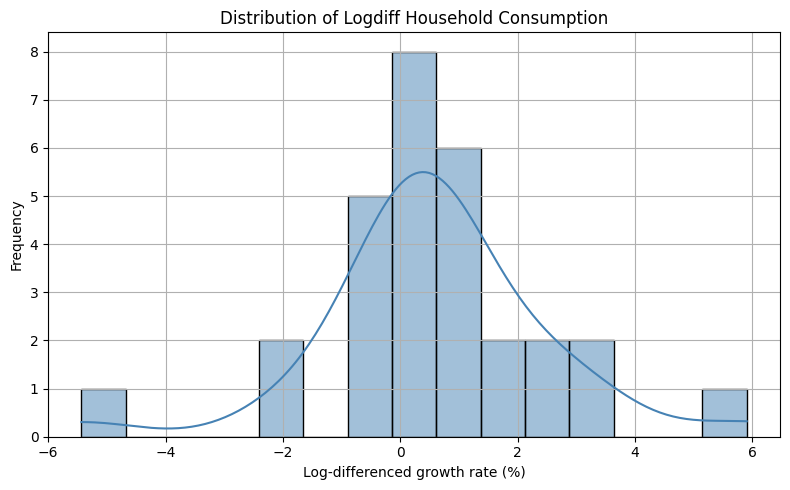

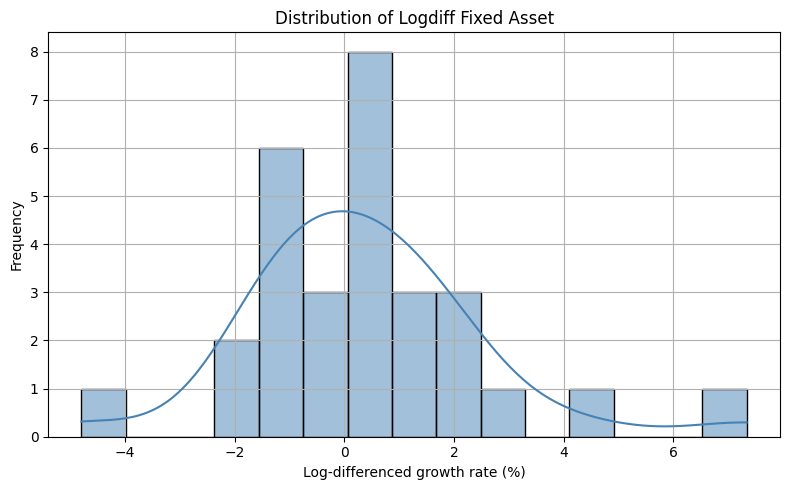

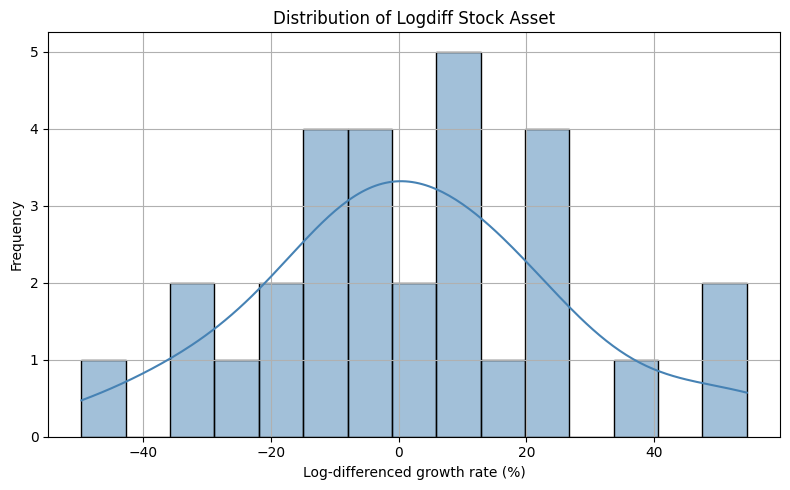

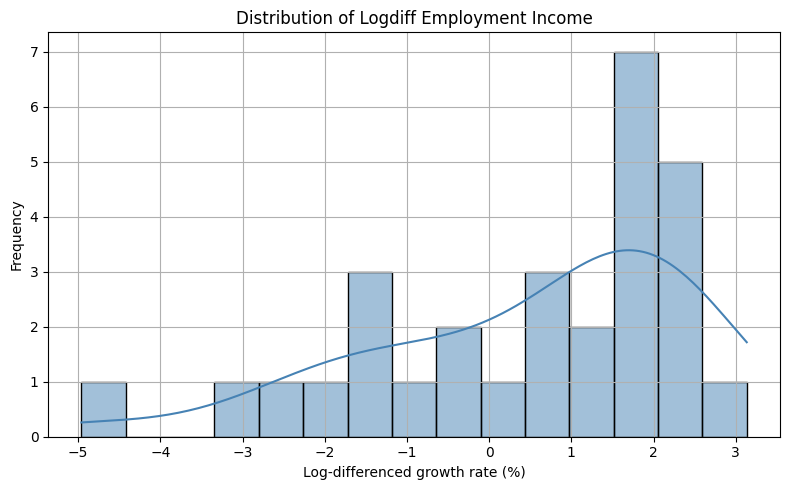

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms with KDE for each log-differenced variable
for col in logdiff_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(logdiff_data[col], bins=15, kde=True, color='steelblue')
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel("Log-differenced growth rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1️⃣ Household Consumption
- The distribution is tightly clustered around 0%, showing that consumption changes only slightly each year. The slight right skew suggests occasional years of stronger positive growth, but overall variability is low.

2️⃣ Fixed Asset
- Also centered around zero, with a similar spread to consumption. Most changes are within ±2%, indicating that housing-related wealth changes are gradual and stable over time.

3️⃣ Stock Asset
- This distribution is wider and flatter, reflecting the high volatility of financial assets. While the mean is near 0%, individual years can see large positive or negative swings (from -40% to +50%).

4️⃣ Employment Income
- Like consumption, income growth is concentrated near 0–2%, with a modest right skew. This suggests stable, incremental increases in labor income, consistent with macroeconomic trends in wages.

- Shapiro-Wilk Normality Test

In [ ]:
from scipy.stats import shapiro

# Initialize groups
normal_vars = []       # Passed normality test (p >= 0.05)
non_normal_vars = []   # Failed normality test (p < 0.05)

print("Shapiro-Wilk Normality Test for Log-Differenced Growth Rates:\n")

# Run the test for each log-differenced variable
for col in logdiff_columns:
    stat, p = shapiro(logdiff_data[col].dropna())
    result = f"{col}: W = {stat:.4f}, p-value = {p:.4f}"

    if p >= 0.05:
        normal_vars.append(result)
    else:
        non_normal_vars.append(result)

# Output grouped results
print("Passed (Approximately Normal):")
for r in normal_vars:
    print("  ", r)

print("\nFailed (Not Normal):")
for r in non_normal_vars:
    print("  ", r)


Shapiro-Wilk Normality Test for Log-Differenced Growth Rates:

Passed (Approximately Normal):
   logdiff_stock_asset: W = 0.9795, p-value = 0.8244

Failed (Not Normal):
   logdiff_household_consumption: W = 0.9064, p-value = 0.0140
   logdiff_fixed_asset: W = 0.9192, p-value = 0.0291
   logdiff_employment_income: W = 0.9009, p-value = 0.0103


## 5.3 Overall 

### 5.3.1 Scatter Plot

#### 5.3.1.1 EU

Correlation Matrix:
                  consumption  housing_wealth  financial_assets    income
consumption          1.000000        0.942223          0.931973  0.954639
housing_wealth       0.942223        1.000000          0.943782  0.950784
financial_assets     0.931973        0.943782          1.000000  0.939513
income               0.954639        0.950784          0.939513  1.000000


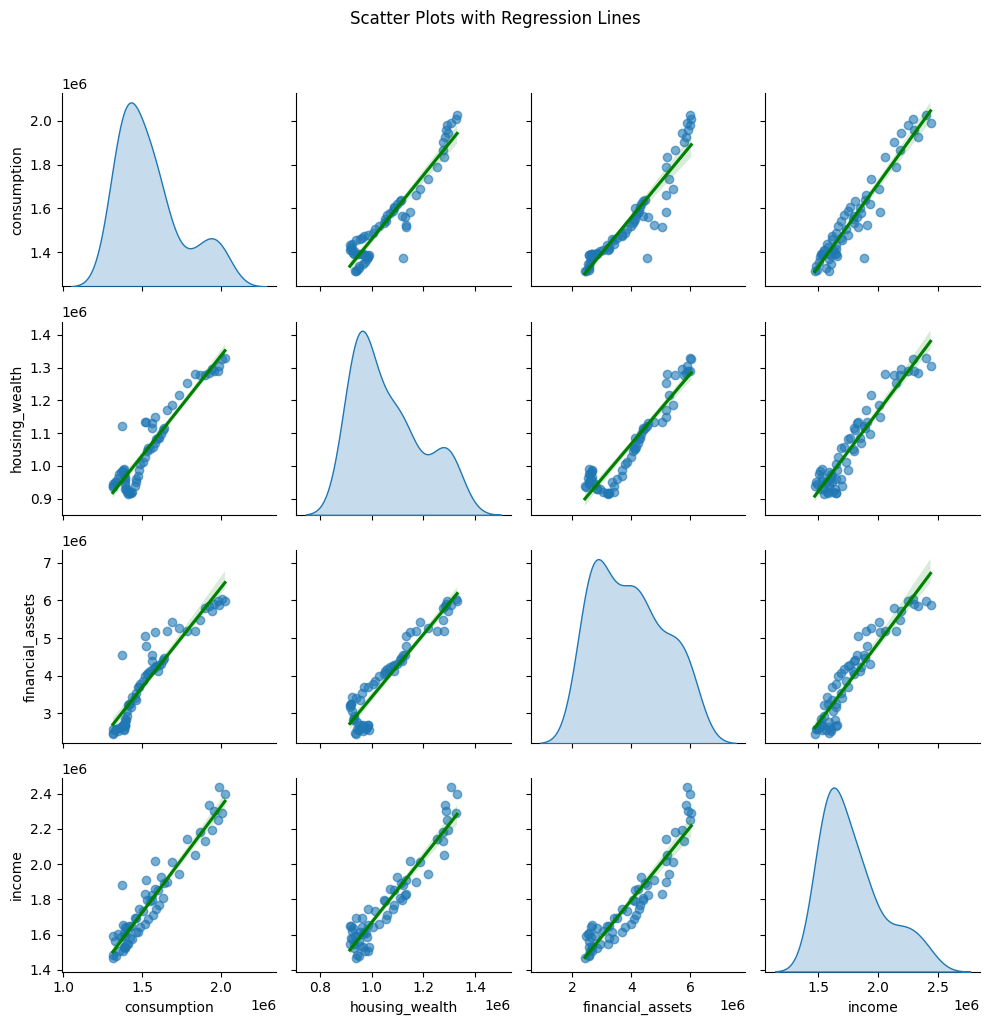

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data
merged_path = "data/clean/EU/merged_eu_data.csv"
df = pd.read_csv(merged_path, parse_dates=['date'])
df = df[['date', 'consumption', 'housing_wealth', 'financial_assets', 'income']]
df = df.sort_values('date').reset_index(drop=True)

# Correlation matrix
data_for_corr = df[['consumption', 'housing_wealth', 'financial_assets', 'income']]
corr_matrix = data_for_corr.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Scatter Plots
sns.pairplot(data_for_corr, kind="reg", diag_kind="kde", 
             plot_kws={"line_kws": {"color": "green"}, "scatter_kws": {"alpha": 0.6}})
plt.suptitle("Scatter Plots with Regression Lines", y=1.02)
plt.tight_layout()
plt.show()

#### 5.3.1.2 Japan

Check the relationship between variables

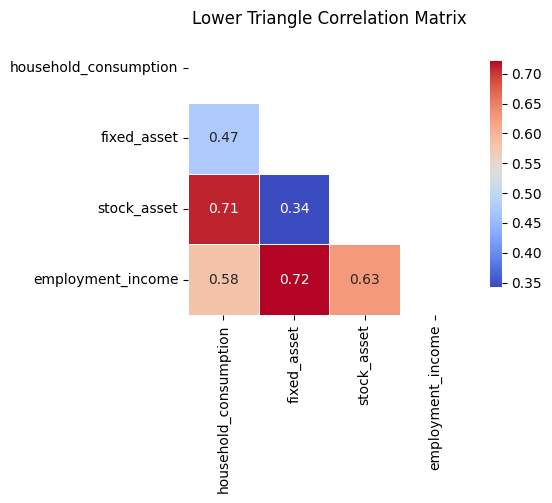

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Select the four macroeconomic variables
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
data_for_corr = merged_data[value_columns]

# Compute correlation matrix
corr_matrix = data_for_corr.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with mask
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title("Lower Triangle Correlation Matrix")
plt.tight_layout()
plt.show()

Draw scatter plot in row level

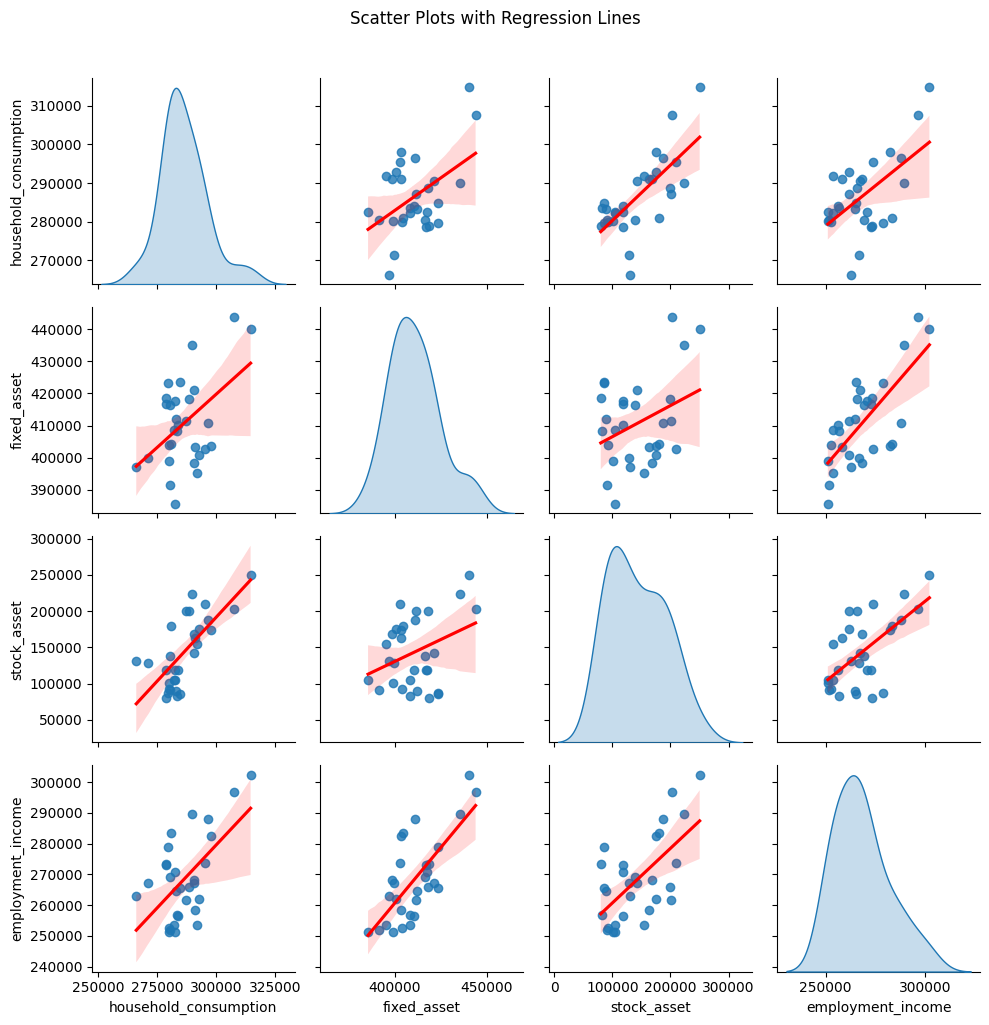

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# set variables
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
data_for_plot = merged_data[value_columns]

# Scatter Plots
sns.pairplot(data_for_plot, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
plt.suptitle("Scatter Plots with Regression Lines", y=1.02)
plt.tight_layout()
plt.show()

Draw scatter plot of Log-Differenced Growth Rate

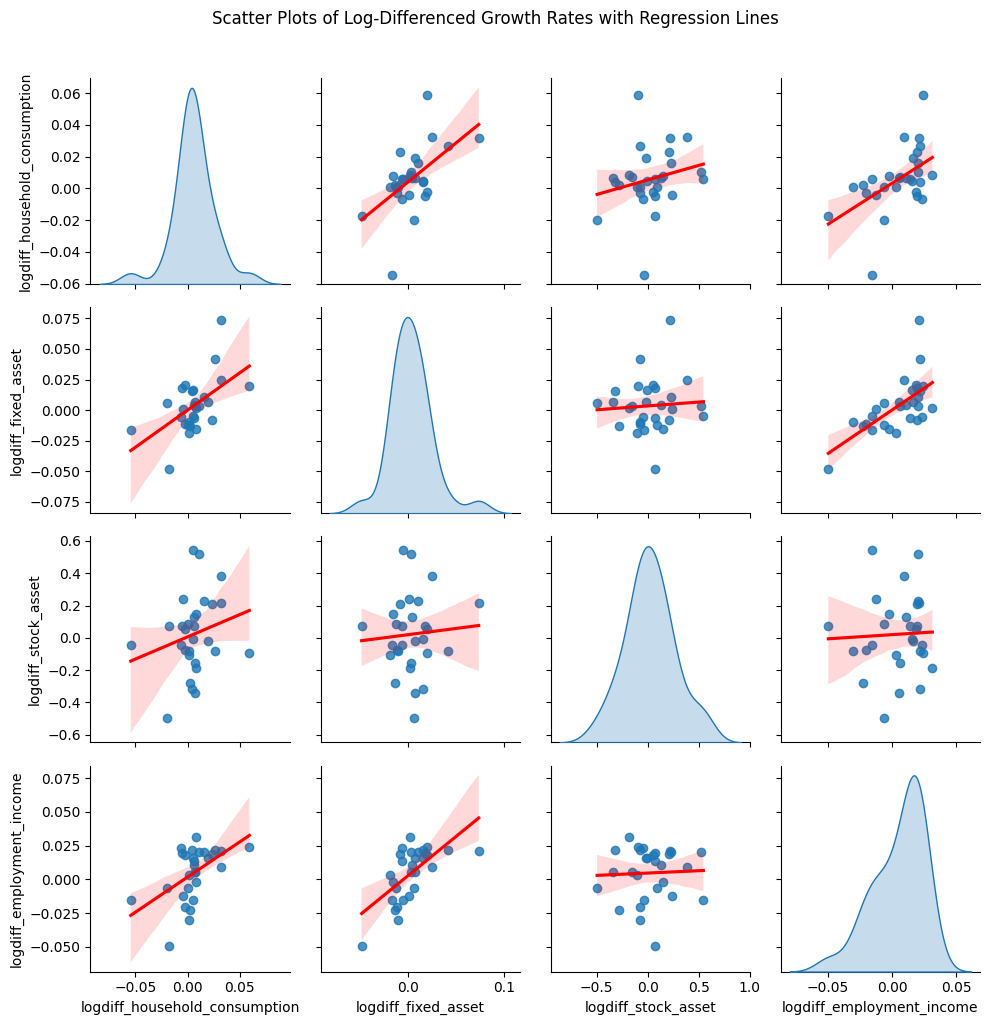

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Select the four macroeconomic variables
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
df = merged_data[value_columns]

# Calculate Log-Differenced Growth Rate
logdiff_data = df.copy()
for col in value_columns:
    logdiff_data[f"logdiff_{col}"] = np.log(df[col]).diff()

# Delete NaN
logdiff_data = logdiff_data.dropna().reset_index(drop=True)

# Get data for plot
logdiff_columns = [f"logdiff_{col}" for col in value_columns]
data_for_plot = logdiff_data[logdiff_columns]

# Plot scatter with regression lines
sns.pairplot(data_for_plot, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
plt.suptitle("Scatter Plots of Log-Differenced Growth Rates with Regression Lines", y=1.02)
plt.tight_layout()
plt.show()

Dashboard with all variables

In [ ]:
import subprocess
import time

# Run the Streamlit app and automatically press Enter to skip email prompt
process = subprocess.Popen(
    ["streamlit", "run", "src/dashboard_app/japan_dashboard.py"],
    stdin=subprocess.PIPE,
)

# Send newline to skip the email prompt
process.stdin.write(b"\n")
process.stdin.flush()

# Wait for the server to start
time.sleep(3)


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8506
  Network URL: http://10.100.143.221:8506



### 5.3.2 Radar Chart (growth rate)

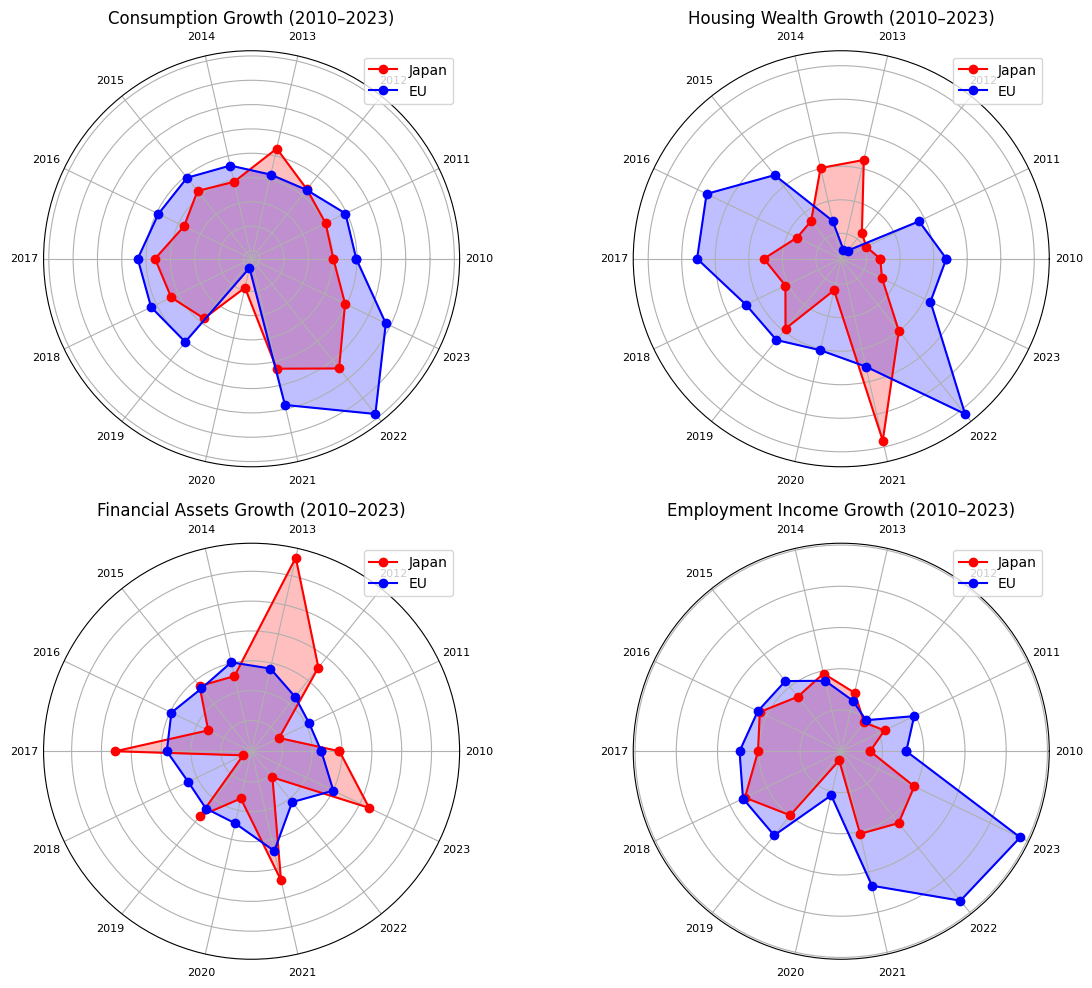

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and process EU data
eu_path = "data/clean/EU/merged_eu_data.csv"
eu = pd.read_csv(eu_path, parse_dates=['date'])
eu['year'] = eu['date'].dt.year

# Aggregate quarterly data to yearly average
eu_vars = ['consumption', 'housing_wealth', 'financial_assets', 'income']
eu_annual = eu.groupby('year')[eu_vars].sum() / 4

# Compute year-over-year growth rates
eu_growth = eu_annual.pct_change() * 100
eu_growth = eu_growth.rename(columns={
    'consumption': 'consumption_growth',
    'housing_wealth': 'housing_growth',
    'financial_assets': 'finance_growth',
    'income': 'income_growth'
})
eu_growth = eu_growth.loc[2010:2023]

# Load and process Japan data
japan_path = "data/clean/japan/merged_macro_data.csv"
japan = pd.read_csv(japan_path)
japan['year'] = japan['year'].astype(int)

# Aggregate yearly data and compute growth rates
japan_vars = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
japan_annual = japan.groupby('year')[japan_vars].mean()
japan_growth = japan_annual.pct_change() * 100
japan_growth = japan_growth.rename(columns={
    'household_consumption': 'consumption_growth',
    'fixed_asset': 'housing_growth',
    'stock_asset': 'finance_growth',
    'employment_income': 'income_growth'
})
japan_growth = japan_growth.loc[2010:2023]

# Define variables and labels for radar charts
growth_vars = {
    'consumption_growth': 'Consumption Growth',
    'housing_growth': 'Housing Wealth Growth',
    'finance_growth': 'Financial Assets Growth',
    'income_growth': 'Employment Income Growth'
}

years = list(range(2010, 2024))
angles = np.linspace(0, 2 * np.pi, len(years), endpoint=False).tolist()
angles += angles[:1]

# Create 2x2 radar plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for ax, (var_key, var_label) in zip(axes, growth_vars.items()):
    jp_values = japan_growth.loc[years][var_key].tolist()
    eu_values = eu_growth.loc[years][var_key].tolist()
    jp_values += [jp_values[0]]
    eu_values += [eu_values[0]]

    ax.plot(angles, jp_values, color='red', marker='o', label='Japan')
    ax.fill(angles, jp_values, color='red', alpha=0.25)

    ax.plot(angles, eu_values, color='blue', marker='o', label='EU')
    ax.fill(angles, eu_values, color='blue', alpha=0.25)

    ax.set_title(f"{var_label} (2010–2023)", fontsize=12)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([str(y) for y in years], fontsize=8)
    ax.set_yticklabels([])
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


# 6 Regression

## 6.1 EU

Prepare variables

In [67]:
import pandas as pd
import numpy as np

# Load merged EU macroeconomic data
merged_path = "data/clean/EU/merged_eu_data.csv"
df = pd.read_csv(merged_path, parse_dates=['date'])

# Keep relevant variables and sort by date
df = df[['date', 'consumption', 'housing_wealth', 'financial_assets', 'income']]
df = df.sort_values('date').reset_index(drop=True)

# Compute quarter-on-quarter (QoQ) growth rates in percent
df['consumption_growth'] = df['consumption'].pct_change() * 100
df['housing_growth'] = df['housing_wealth'].pct_change() * 100
df['finance_growth'] = df['financial_assets'].pct_change() * 100
df['income_growth'] = df['income'].pct_change() * 100

# Apply logarithmic transformation to level variables
df['log_consumption'] = np.log(df['consumption'])
df['log_housing'] = np.log(df['housing_wealth'])
df['log_finance'] = np.log(df['financial_assets'])
df['log_income'] = np.log(df['income'])

# Compute first differences of log-transformed variables (log-diff ≈ continuous growth)
df['logdiff_consumption'] = df['log_consumption'].diff()
df['logdiff_housing'] = df['log_housing'].diff()
df['logdiff_finance'] = df['log_finance'].diff()
df['logdiff_income'] = df['log_income'].diff()

# Drop rows with any missing values (e.g. first row after diff or pct_change)
df_clean = df.dropna().reset_index(drop=True)


### 6.1.1 Modeling of Long-run 

In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load merged EU macroeconomic data
merged_path = "data/clean/EU/merged_eu_data.csv"
df = pd.read_csv(merged_path, parse_dates=['date'])

# Apply logarithmic transformation to level variables
df['log_consumption'] = np.log(df['consumption'])
df['log_housing'] = np.log(df['housing_wealth'])
df['log_finance'] = np.log(df['financial_assets'])
df['log_income'] = np.log(df['income'])

# Prepare dependent and independent variables
X = df[['log_income', 'log_housing', 'log_finance']]
y = df['log_consumption']

# Add constant term
X = sm.add_constant(X)

# 1. Ordinary Least Squares (OLS)
print("\nOrdinary Least Squares (OLS)")
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# 2. Robust OLS with HC3 standard errors (heteroskedasticity-consistent)
print("\nRobust OLS (HC3)")
robust_ols_model = sm.OLS(y, X).fit(cov_type='HC3')
print(robust_ols_model.summary())

# 3. Generalized Least Squares (GLS) — assumes known structure
print("\nGeneralized Least Squares (GLS)")
gls_model = sm.GLS(y, X).fit()
print(gls_model.summary())



Ordinary Least Squares (OLS)
                            OLS Regression Results                            
Dep. Variable:        log_consumption   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     228.0
Date:                Fri, 30 May 2025   Prob (F-statistic):           9.48e-33
Time:                        16:59:32   Log-Likelihood:                 123.97
No. Observations:                  64   AIC:                            -239.9
Df Residuals:                      60   BIC:                            -231.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.44

 - We estimate a log-linear consumption function using OLS, heteroskedasticity-robust OLS (HC3), and GLS.
   - The robust OLS model performs best due to its consistent significance, high explanatory power (Adj. R² = 0.915), and resistance to heteroskedasticity.
   - Despite high R² across all models, residual diagnostics suggest violations of classical assumptions (non-normality, autocorrelation), which robust estimation partially mitigates.

Key Findings (Robust OLS – HC3):

Household consumption is significantly driven by income (β = 0.47, p < 0.001), housing wealth (β = 0.27, p < 0.001), and financial assets (β = 0.09, p = 0.020).
The model explains 91.5% of the variation in consumption (Adj. R² = 0.915), with all variables statistically significant and economically meaningful.



### 6.2.1 Modeling of Short-run

In [72]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load merged EU macroeconomic data
merged_path = "data/clean/EU/merged_eu_data.csv"
df = pd.read_csv(merged_path, parse_dates=['date'])

# Apply logarithmic transformation to level variables
df['log_consumption'] = np.log(df['consumption'])
df['log_housing'] = np.log(df['housing_wealth'])
df['log_finance'] = np.log(df['financial_assets'])
df['log_income'] = np.log(df['income'])

# Compute first differences of log-transformed variables (log-diff ≈ continuous growth)
df['logdiff_consumption'] = df['log_consumption'].diff()
df['logdiff_housing'] = df['log_housing'].diff()
df['logdiff_finance'] = df['log_finance'].diff()
df['logdiff_income'] = df['log_income'].diff()

# Drop first row with NaNs from diff
df = df.dropna().reset_index(drop=True)

# Prepare dependent and independent variables
X = df[['logdiff_income', 'logdiff_housing', 'logdiff_finance']]
y = df['logdiff_consumption']

# Add constant term
X = sm.add_constant(X)

# 1. Ordinary Least Squares (OLS)
print("\nOrdinary Least Squares (OLS)")
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# 2. Robust OLS with HC3 standard errors (heteroskedasticity-consistent)
print("\nRobust OLS (HC3)")
robust_ols_model = sm.OLS(y, X).fit(cov_type='HC3')
print(robust_ols_model.summary())

# 3. Generalized Least Squares (GLS) — assumes known structure
print("\nGeneralized Least Squares (GLS)")
gls_model = sm.GLS(y, X).fit()
print(gls_model.summary())


Ordinary Least Squares (OLS)
                             OLS Regression Results                            
Dep. Variable:     logdiff_consumption   R-squared:                       0.063
Model:                             OLS   Adj. R-squared:                  0.016
Method:                  Least Squares   F-statistic:                     1.330
Date:                 Fri, 30 May 2025   Prob (F-statistic):              0.273
Time:                         17:06:32   Log-Likelihood:                 142.74
No. Observations:                   63   AIC:                            -277.5
Df Residuals:                       59   BIC:                            -268.9
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

 - The short-run model using log-differenced variables performs poorly, explaining only 6% of the variation in consumption growth.
   - Most variables are statistically insignificant, except for housing wealth growth, which shows a positive and robust association with consumption growth.
   - Residual diagnostics indicate severe non-normality and fat-tailed errors, suggesting that linear short-run dynamics may not adequately capture consumption behavior.

## 6.2 Japan

### 6.2.1 Modeling of Long-run 

Empirical Strategy

- Conduct a regression based on the following model:

$$
\log C_{t} = \alpha + \beta \log S_{t} + \gamma \log H_{t} + \phi \log Y_{t} + \epsilon_{t}
$$

- Where:

\begin{array}{ll}
C_{t} & : \text{Household consumption} \\
S_{t} & : \text{Stock market wealth} \\
H_{t} & : \text{Housing wealth} \\
Y_{t} & : \text{Compensation of employees}
\end{array}


Main Focus

- Estimate and compare:

\begin{array}{ll}
\gamma & : \text{Elasticity of consumption with respect to housing wealth} \\
\beta & : \text{Elasticity of consumption with respect to stock market wealth}
\end{array}



 - Make values become log-transformed variables.

In [ ]:
import numpy as np 

# Create log-transformed variables
merged_data["log_household_consumption"] = np.log(merged_data["household_consumption"])
merged_data["log_fixed_asset"] = np.log(merged_data["fixed_asset"])
merged_data["log_stock_asset"] = np.log(merged_data["stock_asset"])
merged_data["log_employment_income"] = np.log(merged_data["employment_income"])

# Check
print(merged_data[["log_household_consumption", "log_fixed_asset", "log_stock_asset", "log_employment_income"]].head())


   log_household_consumption  log_fixed_asset  log_stock_asset  \
0                   0.573804         0.973467        -0.135659   
1                   0.592892         0.980409        -0.152553   
2                   0.619508         1.022120        -0.233564   
3                   0.623247         1.037708        -0.550884   
4                   0.620290         1.026257        -0.627222   

   log_employment_income  
0               0.560846  
1               0.576969  
2               0.598697  
3               0.620770  
4               0.600191  


### 6.2.1.1 OLS

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Prepare independent variables
X = merged_data[["log_fixed_asset", "log_stock_asset", "log_employment_income"]]
X = sm.add_constant(X)  # constant term

# Prepare dependent variable
y = merged_data["log_household_consumption"]

# Run OLS regression
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   OLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     9.536
Date:                       Wed, 14 May 2025   Prob (F-statistic):           0.000202
Time:                               09:55:51   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### → Findings from the Results

### Coefficient Interpretations

- **`log_stock_asset` (Stock Market Wealth)**
  - **Coefficient (β) = 0.0560**, **p-value = 0.003** → **Statistically significant at the 1% level**.
  - → **An increase in stock market wealth is strongly associated with higher household consumption**.

- **`log_fixed_asset` (presumably Housing Wealth)**
  - **Coefficient (γ) = 0.2938**, **p-value = 0.163** → **Not statistically significant (even at the 10% level)**.
  - → **The relationship between housing wealth and consumption appears weak and statistically insignificant**.

- **`log_employment_income` (Compensation of Employees)**
  - **Coefficient = 0.0207**, **p-value = 0.897** → **Highly insignificant**.
  - → **No detectable effect of employment income on consumption in this model**.

### Model Fit

- **R-squared = 0.524** → **Moderate explanatory power** (the model explains about 52% of the variation in household consumption).

### Cautions

- The **Condition Number is large (1850)**, which suggests **potential multicollinearity**.

---

### Summary (in brief)
- **Stock market wealth has a small but statistically significant positive effect on consumption.**
- **Housing wealth shows a larger coefficient but is not statistically significant.**
- **Employment income appears irrelevant for consumption dynamics in this model.**
- **Maybe multicollinearity issues occurs.**


#### 6.2.1.2 Robust OLS

In [ ]:
import statsmodels.api as sm

# Add constant term
X = sm.add_constant(X)

# Fit OLS with robust standard errors (HC3 type)
robust_ols_model = sm.OLS(y, X).fit(cov_type='HC3')

# Show summary
print(robust_ols_model.summary())

                                OLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   OLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     7.351
Date:                       Wed, 14 May 2025   Prob (F-statistic):            0.00101
Time:                               09:55:51   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                         HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

#### 6.2.1.3 GLS (Generalized Least Squares)

In [ ]:
# Fit Generalized Least Squares (assumes known structure of heteroscedasticity or correlation)
gls_model = sm.GLS(y, X).fit()

# Show summary
print(gls_model.summary())

                                GLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   GLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     9.536
Date:                       Wed, 14 May 2025   Prob (F-statistic):           0.000202
Time:                               09:55:51   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### 6.2.1.4 GLM (Generalized Linear Model)

In [ ]:
# Fit Generalized Linear Model with Gaussian family (similar to OLS)
glm_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Show summary
print(glm_model.summary())


                     Generalized Linear Model Regression Results                     
Dep. Variable:     log_household_consumption   No. Observations:                   30
Model:                                   GLM   Df Residuals:                       26
Model Family:                       Gaussian   Df Model:                            3
Link Function:                      Identity   Scale:                      0.00060377
Method:                                 IRLS   Log-Likelihood:                 70.763
Date:                       Wed, 14 May 2025   Deviance:                     0.015698
Time:                               09:55:51   Pearson chi2:                   0.0157
No. Iterations:                            3   Pseudo R-squ. (CS):             0.6184
Covariance Type:                   nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

## Summary of Findings (Based on GLM Results)

### Research Question 1:
**How does the elasticity of consumption with respect to different types of household wealth differ?**
- Stock market wealth has a **significant positive effect** on consumption.
- Housing wealth appears more elastic but **is not statistically significant**.
- Income shows **no explanatory power** in this specification.

### Research Question 2:
**What are the differences in elasticity between housing and stock market wealth in Japan?**

- The **elasticity of housing wealth (0.29)** is higher than that of stock market wealth (0.056).
- However, only the effect of **stock market wealth is statistically significant**.
- Conclusion: **Only stock market wealth can be confirmed to influence consumption reliably** in this model.

### Remaining Issues

1. **Statistical insignificance of housing wealth**  
   → May require more data or alternative modeling techniques.

2. **No checks for time series assumptions**  
   → Stationarity (ADF test) and autocorrelation (Durbin-Watson) still need to be verified.

### 6.2.2 Modeling of Short-run 

### Empirical Strategy

- Conduct a regression based on the following log-difference (approximate growth rate) model:

$$
\Delta \log C_{t} = \beta \Delta \log S_{t} + \gamma \Delta \log H_{t} + \phi \Delta \log Y_{t} + \epsilon_{t}
$$

- Where:

\begin{array}{ll}
\Delta \log C_{t} & : \text{Growth rate of household consumption (approximate)} \\
\Delta \log S_{t} & : \text{Growth rate of stock market wealth} \\
\Delta \log H_{t} & : \text{Growth rate of housing wealth} \\
\Delta \log Y_{t} & : \text{Growth rate of compensation of employees}
\end{array}

Main Focus

- Estimate and interpret short-run elasticities (growth effects):

\begin{array}{ll}
\gamma & : \text{Short-run effect of housing wealth growth on consumption growth} \\
\beta & : \text{Short-run effect of stock wealth growth on consumption growth}
\end{array}


#### 6.2.2.1 Robust OLS

In [ ]:
import statsmodels.api as sm

y = logdiff_data["logdiff_household_consumption"]  # ∆log C_t
X = logdiff_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income"
]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type="HC3")  # Use robust SE due to potential non-normality
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.384
Model:                                       OLS   Adj. R-squared:                  0.310
Method:                            Least Squares   F-statistic:                     6.094
Date:                           Wed, 14 May 2025   Prob (F-statistic):            0.00293
Time:                                   09:55:51   Log-Likelihood:                -53.005
No. Observations:                             29   AIC:                             114.0
Df Residuals:                                 25   BIC:                             119.5
Df Model:                                      3                                         
Covariance Type:                             HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
------

Part 1: Residual Diagnostics (Normality & Autocorrelation)

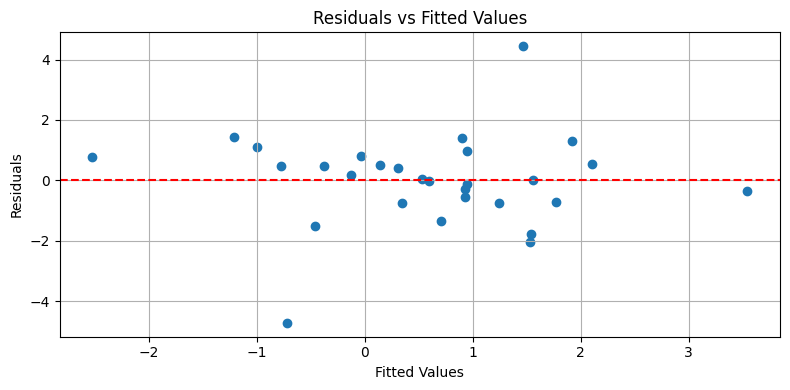

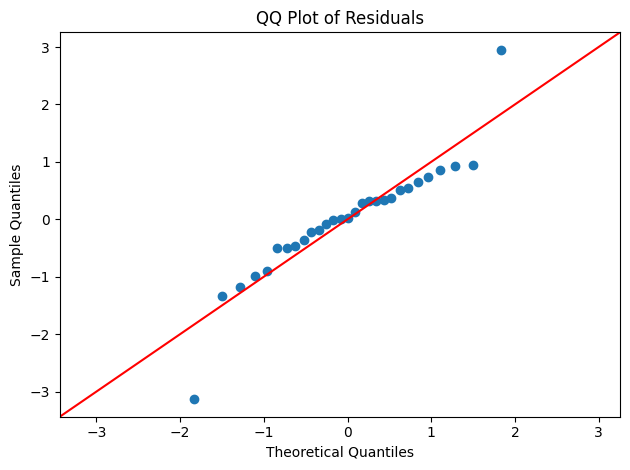

Ljung-Box Test for Autocorrelation (lag=1):
    lb_stat  lb_pvalue
1  1.789977   0.180929


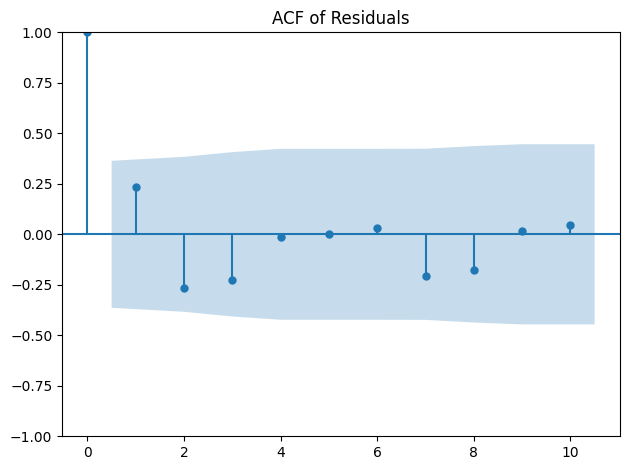

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import probplot

# residual
residuals = model.resid

# Residuals vs Fitted Values
plt.figure(figsize=(8, 4))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# QQ plot (check normality of residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

# Ljung-Box test for autocorrelation (lag 1)
lb_test = acorr_ljungbox(residuals, lags=[1], return_df=True)
print("Ljung-Box Test for Autocorrelation (lag=1):")
print(lb_test)

# Autocorrelation Function (ACF) plot of residuals
sm.graphics.tsa.plot_acf(residuals, lags=10)
plt.title("ACF of Residuals")
plt.tight_layout()
plt.show()


### Regression Diagnostics Summary

- **Residuals vs Fitted Values**: The plot shows no clear patterns or funnel shapes, suggesting that the residuals have constant variance and that the model is correctly specified.

- **QQ Plot of Residuals**: Most residuals lie along the 45-degree line, indicating approximate normality. Some deviations at the tails suggest mild non-normality, which is addressed by using robust standard errors (HC3).

- **ACF Plot**: The autocorrelation function shows no significant autocorrelation in residuals up to 10 lags. This confirms the independence assumption holds.

Overall, diagnostic plots support the validity of the linear regression model with robust standard errors.


Part 2: Regression with Lagged Dependent Variable (AR(1) Model)

In [ ]:
# Add one-period lag of the dependent variable
logdiff_data["logdiff_household_consumption_lag1"] = logdiff_data["logdiff_household_consumption"].shift(1)

# Drop missing value due to lag
ar_data = logdiff_data.dropna().copy()

# Define y and X including AR(1) term
y_ar = ar_data["logdiff_household_consumption"]
X_ar = ar_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income",
    "logdiff_household_consumption_lag1"  # AR(1) term
]]
X_ar = sm.add_constant(X_ar)

# Fit OLS model with robust standard errors
ar_model = sm.OLS(y_ar, X_ar).fit(cov_type='HC3')

# Show summary
print("OLS with AR(1) Term:")
print(ar_model.summary())


OLS with AR(1) Term:
                                  OLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.426
Model:                                       OLS   Adj. R-squared:                  0.326
Method:                            Least Squares   F-statistic:                     3.129
Date:                           Wed, 14 May 2025   Prob (F-statistic):             0.0342
Time:                                   09:55:52   Log-Likelihood:                -50.445
No. Observations:                             28   AIC:                             110.9
Df Residuals:                                 23   BIC:                             117.6
Df Model:                                      4                                         
Covariance Type:                             HC3                                         
                                         coef    std err          z      P>|z| 

#### 6.2.2.2 GLS (Generalized Least Squares)

In [ ]:
import statsmodels.api as sm

# Define variables
y_gls = logdiff_data["logdiff_household_consumption"]
X_gls = logdiff_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income"
]]
X_gls = sm.add_constant(X_gls)

# Fit GLS model
gls_model = sm.GLS(y_gls, X_gls).fit()

# Summary
print("GLS Regression Results:")
print(gls_model.summary())


GLS Regression Results:
                                  GLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.384
Model:                                       GLS   Adj. R-squared:                  0.310
Method:                            Least Squares   F-statistic:                     5.195
Date:                           Wed, 14 May 2025   Prob (F-statistic):            0.00630
Time:                                   09:55:52   Log-Likelihood:                -53.005
No. Observations:                             29   AIC:                             114.0
Df Residuals:                                 25   BIC:                             119.5
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                                coef    std err          t      P>|t|      [

#### 6.2.2.3 GLM (Generalized Linear Model)

In [ ]:
import statsmodels.api as sm

# Define variables
y_gls = logdiff_data["logdiff_household_consumption"]
X_gls = logdiff_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income"
]]

glm_model = sm.GLM(
    y_gls, X_gls, 
    family=sm.families.Gaussian()
).fit()

# Summary
print("GLM Regression Results:")
print(glm_model.summary())

GLM Regression Results:
                       Generalized Linear Model Regression Results                       
Dep. Variable:     logdiff_household_consumption   No. Observations:                   29
Model:                                       GLM   Df Residuals:                       26
Model Family:                           Gaussian   Df Model:                            2
Link Function:                          Identity   Scale:                          2.6160
Method:                                     IRLS   Log-Likelihood:                -53.510
Date:                           Wed, 14 May 2025   Deviance:                       68.015
Time:                                   09:55:52   Pearson chi2:                     68.0
No. Iterations:                                3   Pseudo R-squ. (CS):             0.4024
Covariance Type:                       nonrobust                                         
                                coef    std err          z      P>|z|      [

Summary (Based on Robost OLS)

- The growth rate of **housing assets** (fixed_asset) has a statistically **significant** positive effect on the growth rate of consumption
  - Changes in consumption tend to be linked to housing-related assets in particular

- **Stock assets** and **employer compensation** are **not significant**
  - At least in the short-run (log-difference model), the effect may be limited


# 7. Finding and Summary

- Key Findings:
    - EU:
      - Household consumption exhibits a steady upward trend over time, closely tracking the rise in employment income and housing wealth.
      - A sharp decline in 2020, followed by a swift rebound, reflects the consumption shock caused by the COVID-19 pandemic and subsequent recovery.
      - In the long-run model, income, housing wealth, and financial assets all show statistically significant and positive effects on consumption, with income being the most influential driver.
      - In the short-run model, only housing wealth growth is significantly associated with consumption growth, while income and financial asset changes show no significant short-term effects.
    - Japan:  
      - Stock market wealth has a significant short-run positive effect on household consumption, indicating that financial gains influence spending behavior in Japan.
      - Housing wealth shows a larger coefficient but is not statistically significant, suggesting limited short-run consumption response to changes in real estate value.
      - Employment income has no significant effect in the log-differenced model, reflecting the stability and rigidity of Japan’s wage structure.
      - Consumption is tightly linked to labor income in level terms, but short-run fluctuations are more sensitive to asset-based wealth, particularly financial assets.

### EU: 
 - To Research Question: Does household consumption increase with household wealth?
   - Yes – Clear Long-Run Relationship
   - Conclusion: In the EU, household consumption increases with household wealth in the long run, especially with stable income and rising real estate and financial asset values.
### Japan: 
 - To Research Question: Does household consumption increase with household wealth?
   - Yes – Conditional Short-Run Effects
   - Conclusion: In Japan, short-term consumption responds mainly to financial wealth, not housing or income.
